# TP 2 : Fouille d’itemsets fréquents et de règles d’association sous Python

IMT Atlantique – FIL A3  <br/>
Apprentissage Automatique

## Objectifs :

MLxtend (pour machine learning extensions) est une bibliothèque logicielle développée par Sebas-
tian Raschka, qui propose des méthodes d’extraction de itemsets fréquents et de règles d’association
basée sur Apriori. D’autres algorithmes plus sophistiqués sont aussi proposés.

Ce TP se déroule en deux parties : découverte de MLxtend via des exemples 1 simples et application
d’algorithmes de fouille de itemsets sur des données de vente au détail en ligne.

### 1 Partie 1 : MLxtend pour la fouille d’itemsets

### 1.1 Installation

MLxtend est une bibliothèque Python qui implémente différentes méthodes pour l’apprentissage
machine. Parmi ces méthodes, on retrouve les algorithmes d’extraction de itemsets fréquents, de
maximaux fréquents et de règles d’association.

L’installation de cette bibliothèque se fait via [canda](http://rasbt.github.io/mlxtend/installation/), avec la commande suivante :

```bash
conda install mlxtend --channel conda-forge
```

L’utilisation de fonctionnalités de MLxtend commence par l’importation de ces trois librairies :

In [11]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax
from mlxtend.frequent_patterns import association_rules

###1.2 Importation et préparation des données

### 1.2.1 Données transactionnelle

Considérons le dataset ci-dessous décrivant les caddies de supermarché.

In [12]:
dataset = [ ['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']
]

### 1.2.2 Transformation en tableau binaire

La méthode apriori de la librairie MLxtend prend en entrée un tableau binaire où sont recensés
la présence (codé True) ou l’absence (codée par False) des produits dans chaque caddie.

— L’objet TransactionEncoder permet de transformer un ensemble de données en un tableau
binaire ;  
— Avec la méthode fit, le TransactionEncoder apprend les étiquettes uniques dans l’ensemble de données, et via la méthode de transformation, il transforme l’ensemble de données d’entrée (une liste de listes) en un tableau de booléens.

In [13]:
TB = TransactionEncoder()
TBA = TB.fit(dataset).transform(dataset)

Le résultat de cette étape est un tableau NumPy au format ndarray. Il est possible de transformer
ce tableau en un dataframe grâce à Pandas :

In [14]:
import pandas as pd
df = pd.DataFrame (TBA, columns=TB.columns_)

### 1.3 Extraction d’itemsets fréquents et des maximaux

Pour extraire les itemsets fréquents il faut appliquer la fonction apriori() au dataframe et
fixer la valeur du support minimum (dans notre cas, min support=0.5). Il est aussi possible de
contraindre la taille des itemsets retournés avec le paramètre max len.

In [15]:
FI = apriori(df,min_support=0.5, use_colnames=True)

Les résultats sont stockés dans une structure de type ”pandas/DataFrame”.

In [16]:
type(FI)

pandas.core.frame.DataFrame

Elle est composée de 2 colonnes : le support et la description des itemsets.

In [17]:
print(FI.columns)

Index(['support', 'itemsets'], dtype='object')


Pour nos données et avec les paramètres ci-dessus, vous devez obtenir 11 itemsets fréquents suivants.

In [18]:
print(FI)

    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Onion, Eggs, Kidney Beans)


On souhaite à présent mesurer le temps d’exécution de Apriori pour extraire les itemsets
fréquents. Pour cela, nous allons utiliser la fonction magique ipython %timit, qui peut être utilisée
pour chronométrer un morceau de code particulier (une seule instruction d’exécution ou une seule
méthode).

##### Note
Usage, in line mode :
%timeit -n<N> -r<R> [-t|-c] -q -p<P> -o] statement

In [19]:
%timeit -n 100 -r 10 apriori(df, min support=0.5)

SyntaxError: invalid syntax (<unknown>, line 1)

La librairie MLxtend propose d’autres algorithmes sophistiqués pour extraire les itemsets fréquents,
comme l’algorithme fpgrowth.

##### Question
Appliquez l’algorithme fpgrowth pour extraire les itemsets fréquents, puis comparez les temps
de calculs avec Apriori. Que pouvez-vous conclure ?

Pour extraire les itemsets fréquents maximaux, il faut utiliser la fonction fpmax.

In [ ]:
MFI = fpmax(df,min_support=0.5, use_colnames=True)
print(MFI)

### 1.4Extraction de règles d’association

La fonction association rules de MLxtend prend les dataframes des itemsets fréquents pro-
duits par les fonctions apriori(), fpgrowth() ou fpmax().

Pour limiter le nombres de règles extraites, la fonction permet de spécifier (1) la métrique
d’intérêt (paramètre metric) et (2) le seuil correspondant (paramètre min threshold). Les mesures
actuellement mises en œuvre sont la confiance (metric = ”confidence”) et le lift (metric = ”lift”).

Le code ci-dessous illustre un exemple d’extraction de règles d’association à partir de itemsets
fréquents avec un niveau de confidence d’au moins 80% (min threshold=0.8).

In [ ]:
AR = association_rules(FI,metric="confidence",min_threshold=0.8)

##### Question
Affichez pour chaque règle l’antécédent et son le conséquent.

### 2 Partie 2 : Application à des données de vente en détail

Nous allons maintenant appliquer les différents algorithmes vus précédemment sur des données
de vente en détail en ligne issu de la base retail. Le fichier ”retail dataset.csv ” est un
fichier au format csv qui se présente sous la forme d’une base transactionnelle ou les transactions
représentent des caddies de supermarché : chaque ligne correspond aux noms des produits.

### 2.1 Évaluation

Vous devez rendre un code python qui tourne sur netbook Jupyter + un mini rapport (format
pdf) présentant le travail réalisé, les résultats obtenus et une analyse (intéressante) de ces résultats.

### 2.2 Travail à faire

1. Charger et transformer les données de façon à ce qu’elles soient reconnues comme des tran-
sactions. En pratique on construit un tableau de données binaires.
Les instructions Python suivantes permettent de charger le jeu de données retail :

In [21]:
import pandas as pd
db = pd.read_csv('retail_dataset.csv',sep=',',header=0)
print(db.head(10))

        0       1       2       3       4       5       6
0   Bread    Wine    Eggs    Meat  Cheese  Pencil  Diaper
1   Bread  Cheese    Meat  Diaper    Wine    Milk  Pencil
2  Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
3  Cheese    Meat    Eggs    Milk    Wine     NaN     NaN
4    Meat  Pencil    Wine     NaN     NaN     NaN     NaN
5    Eggs   Bread    Wine  Pencil    Milk  Diaper   Bagel
6    Wine  Pencil    Eggs  Cheese     NaN     NaN     NaN
7   Bagel   Bread    Milk  Pencil  Diaper     NaN     NaN
8   Bread  Diaper  Cheese    Milk    Wine    Eggs     NaN
9   Bagel    Wine  Diaper    Meat  Pencil    Eggs  Cheese


2. Utiliser l’algorithme Apriori pour extraire les itemsets fréquents et les maximaux. Vous choisirez un support minimum de 3%.
— Que se passe t’il si on fait varier le seuil du support ?  <br/>
— Tracer une courbe montrant l’évolution du nombre de itemsets extraits en fonction du support minimum.  <br/>

In [61]:
import numpy as np
db_trans = np.array(
    list(map(lambda x:
        list(map(lambda y: '' if type(y) != str else y, x
        ))
    ,db.values))
)
#print(db_trans)

TDB = TransactionEncoder()
TDBA = TDB.fit(db_trans).transform(db_trans)
#print(TDB.columns_)
#print(TDBA)

dbf = pd.DataFrame (TDBA, columns=TDB.columns_).drop(columns=[''])
#print(dbf)

DBI = [{'support': 0.5, 'results' :apriori(dbf,min_support=0.5, use_colnames=True)}]
print(DBI)

[{'support': 0.5, 'results':     support  itemsets
0  0.504762   (Bread)
1  0.501587  (Cheese)
2  0.501587    (Milk)}]


In [62]:
## Que se passe t’il si on fait varier le seuil du support ?
for i in range(1,5):
    DBI.append({'support': i/10, 'results' :apriori(dbf,min_support=i/10, use_colnames=True)})
print(DBI[len(DBI)-1])


{'support': 0.4, 'results':     support  itemsets
0  0.425397   (Bagel)
1  0.504762   (Bread)
2  0.501587  (Cheese)
3  0.406349  (Diaper)
4  0.438095    (Eggs)
5  0.476190    (Meat)
6  0.501587    (Milk)
7  0.438095    (Wine)}


<AxesSubplot:xlabel='min_support', ylabel='nb_of_itemsets'>

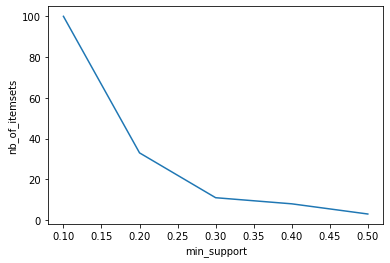

In [70]:
## Tracer une courbe montrant l’évolution du nombre de itemsets extraits en fonction du support minimum.
dataset2 = pd.DataFrame(data= {
    'min_support': [x['support'] for x in DBI ],
    'nb_of_itemsets': [len(x['results']) for x in DBI ]})

import seaborn as sns
sns.lineplot(data=dataset2 ,x='min_support', y="nb_of_itemsets")

3. Nous souhaitons pouvoir filtrer les itemsets selon la présence d’items ou d’un ensemble
d’items.  <br/>
Par exemple, quels sont les itemsets qui contiennent le produit ’Eggs’ ? les produits
{’Eggs’,’Meat’} ?

##### Note
Plusieurs solutions s‘offrent à vous pour la recherche d’itemsets répondant à des condi-
tions de présence d’items. Vous pouvez par exemple utiliser les opérateurs de comparaison
de [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html).

4. Utiliser l’algorithme Apriori pour extraire les règles d’association à partir des itemsets
fréquents et des itemsets maximaux. Vous choisirez une confiance minimale de 75%. Extraire
les règles ayant pour conséquents ’Chesse’.

##### Note
La fonction association rules() renvoie un objet de type pandas.dataframe contenant
les différentes règles d’association, chacune décrite par différentes caractéristiques qui sont
l’antécédent, le conséquent, et 7 indicateurs numériques d’évaluation des règles. Il faudra adap-
ter l’affichage pour disposer que des informations liées aux mesures support, lift et la confidence.

5. Compléter l’analyse des différentes règles d’association extraites via des graphiques permet-
tant d’étudier la corrélation entre les trois mesures (lift, confiance et support) d’évaluation
des règles.

### 3 Références
1. [MLxtend : machine learning extensions](http://rasbt.github.io/mlxtend/)
2. [Introduction to Market Basket Analysis in Python](https://pbpython.com/market-basket-analysis.html)
3. [Association Rule Mining via Apriori Algorithm in Python](https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/)
4. [Documentation Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api)
5. [Documentation MLxtend](http://rasbt.github.io/mlxtend)




